In [184]:
import pandas as pd
import math
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt

In [185]:
d= pd.read_csv('lab3data/individual_data.csv')
d.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.IMU.header.seq,field.IMU.header.stamp,field.IMU.header.frame_id,field.IMU.orientation.x,field.IMU.orientation.y,field.IMU.orientation.z,...,field.MagField.magnetic_field_covariance0,field.MagField.magnetic_field_covariance1,field.MagField.magnetic_field_covariance2,field.MagField.magnetic_field_covariance3,field.MagField.magnetic_field_covariance4,field.MagField.magnetic_field_covariance5,field.MagField.magnetic_field_covariance6,field.MagField.magnetic_field_covariance7,field.MagField.magnetic_field_covariance8,field.values
0,1698010111753763478,1082,1698010111728295087,IMU1_Frame,4366,1698010111728295087,IMU1_Frame,-0.704610,0.100042,0.692840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1698010111778485379,1083,1698010111753368139,IMU1_Frame,4367,1698010111753368139,IMU1_Frame,-0.704456,0.099976,0.693112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1698010111803540690,1084,1698010111778174638,IMU1_Frame,4368,1698010111778174638,IMU1_Frame,-0.704356,0.100680,0.692996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1698010111828401849,1085,1698010111803110361,IMU1_Frame,4369,1698010111803110361,IMU1_Frame,-0.704305,0.101033,0.692938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1698010111853725007,1086,1698010111828063488,IMU1_Frame,4370,1698010111828063488,IMU1_Frame,-0.704552,0.100389,0.692790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [186]:
x=(d['%time']-1698010111700000000)/1000000000
ang_x=d['field.IMU.angular_velocity.x']
ang_y=d['field.IMU.angular_velocity.y']
ang_z=d['field.IMU.angular_velocity.z']
mag_x=d['field.MagField.magnetic_field.x']
mag_y=d['field.MagField.magnetic_field.y']
mag_z=d['field.MagField.magnetic_field.z']


In [187]:
roll=[]
yaw=[]
pitch=[]
for i in range(33944):
    qx = d['field.IMU.orientation.x']
    qy = d['field.IMU.orientation.y']
    qz = d['field.IMU.orientation.z']
    qw = d['field.IMU.orientation.w']
    quat = [qx[i], qy[i], qz[i], qw[i]]
    
    r = Rotation.from_quat(quat)
    euler_angles = r.as_euler('xyz')
    
    rolls = euler_angles[0]  # Rotation around the x-axis (roll)
    pitchs = euler_angles[1]  # Rotation around the y-axis (pitch)
    yaws = euler_angles[2]
    roll.append(rolls)
    yaw.append(yaws)
    pitch.append(pitchs)

In [188]:
def graphing(x,y,):
    plt.hist(x,bins=50, color='blue', edgecolor='black')
    plt.xlabel(y)
    plt.ylabel('Frequency')
    plt.title('Histogram ')
    print(np.mean(x))
    print(np.std(x))
    


In [189]:
def timeseries(x,y,yname):
    a = np.array(x)
    b = np.array(y)
    plt.xlabel('Time')
    plt.ylabel(yname)
    plt.title('Timeseries ')
    plt.plot(a, b)
    

-2.052711319627974
0.005632684902042558


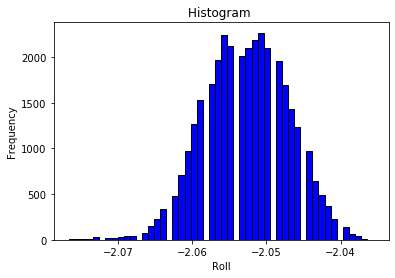

In [190]:
graphing(roll,'Roll')


1.5334600528356128
0.006488913849497082


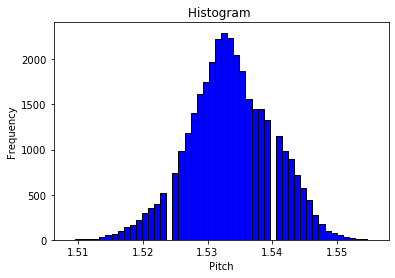

In [191]:
graphing(pitch,'Pitch')


0.7164089038634307
0.07408400080260436


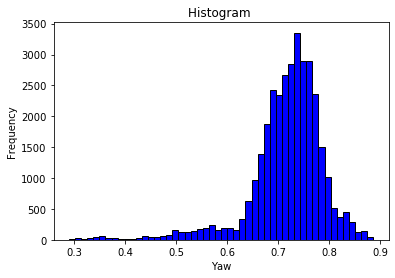

In [192]:
graphing(yaw,'Yaw')


5.516262078717889e-06
0.0007448542406968123


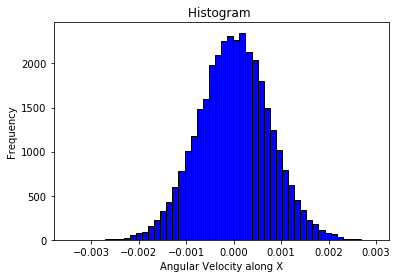

In [193]:
graphing(ang_x,'Angular Velocity along X')


-3.428617723308979e-06
0.0009411410353794788


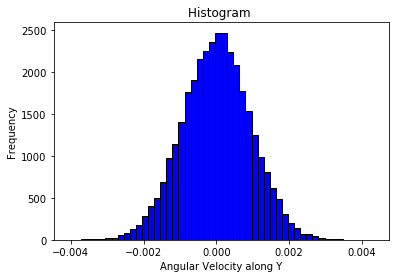

In [194]:
graphing(ang_y,'Angular Velocity along Y')


5.385635163799197e-06
0.0007263771967508148


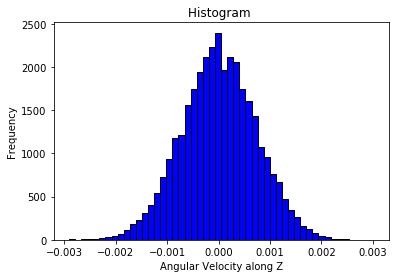

In [195]:
graphing(ang_z,'Angular Velocity along Z')


0.2785227610181475
0.001595952513346805


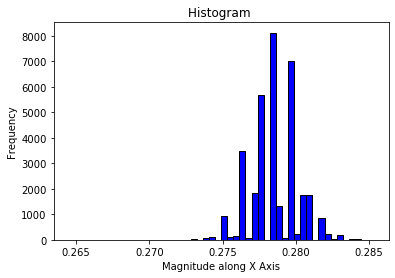

In [196]:
graphing(mag_x,'Magnitude along X Axis')

-0.07805647537119963
0.004760813190172163


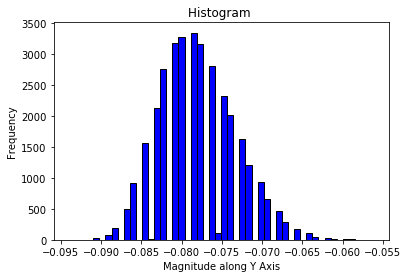

In [197]:
graphing(mag_y,'Magnitude along Y Axis')

0.359950132571294
0.0058395209303564325


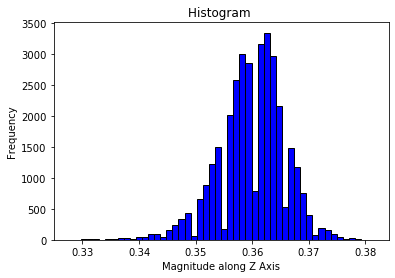

In [198]:
graphing(mag_z,'Magnitude along Z Axis')

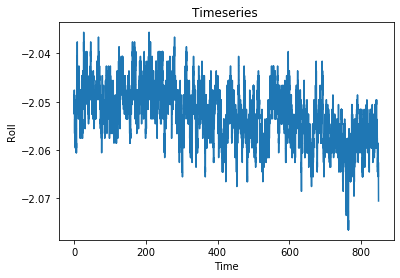

In [199]:
timeseries(x,roll,'Roll')




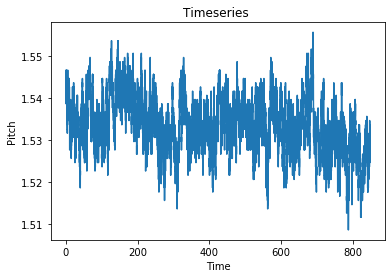

In [200]:
timeseries(x,pitch,'Pitch')


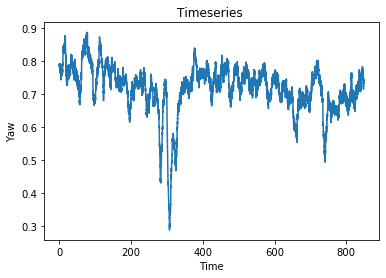

In [201]:
timeseries(x,yaw,'Yaw')


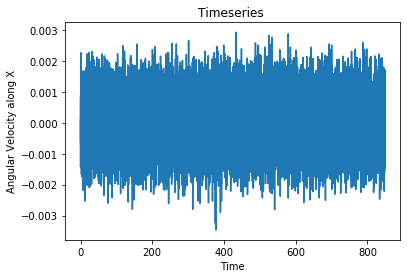

In [202]:
timeseries(x,ang_x,'Angular Velocity along X')


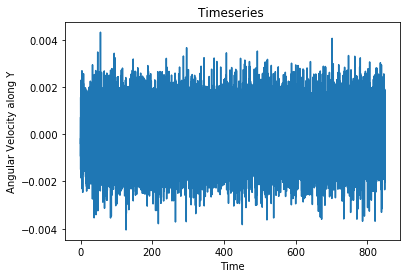

In [203]:
timeseries(x,ang_y,'Angular Velocity along Y')


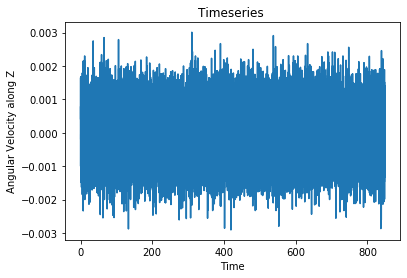

In [204]:
timeseries(x,ang_z,'Angular Velocity along Z')


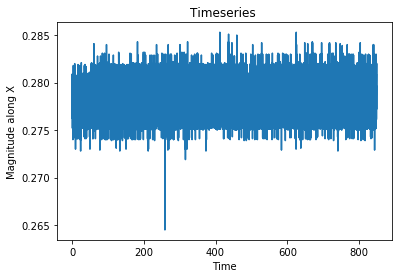

In [205]:
timeseries(x,mag_x,'Magnitude along X')


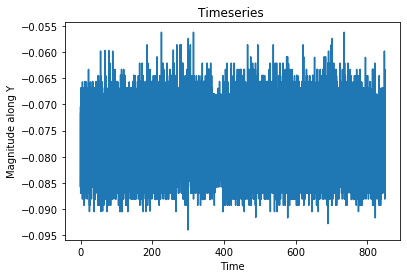

In [206]:
timeseries(x,mag_y,'Magnitude along Y')


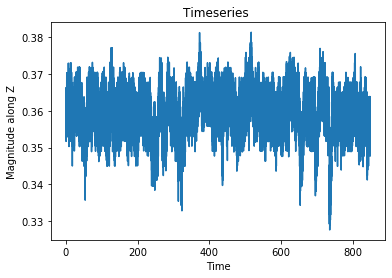

In [207]:
timeseries(x,mag_z,'Magnitude along Z')
